# DSNY Bureau of Recycling and Sustainability Skills Assessment: Lupercio, Daniel 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt    
import datetime

## 1. Using python and pandas library or any other data analysis library, parse the data out of the excel or csv file and complete the following:

### a. Create a pivot table where tonnages are summed up by material type and year. Combine RESORGANICSTONS,SCHOOLORGANICTONS and LEAVESORGANICTONS into a single column “ORGANICS”.

In [2]:
DSNY_waste = pd.read_csv("C:/Users/Daniel/Downloads/DSNY_Monthly_Tonnage_Data.csv")
print(DSNY_waste.head(10))
print()

       MONTH    BOROUGH COMMUNITYDISTRICT  REFUSETONSCOLLECTED  \
0  1993 / 11  Manhattan                01                625.2   
1  1992 / 03  Manhattan                01                726.0   
2  1995 / 08  Manhattan                01                627.5   
3  1991 / 08  Manhattan                01                695.1   
4  1995 / 09  Manhattan                01                633.1   
5  1996 / 04   Brooklyn                07               3478.8   
6  2007 / 08   Brooklyn                07               3648.4   
7  2012 / 01   Brooklyn                07               3156.7   
8  2003 / 11   Brooklyn                07               3729.5   
9  2004 / 08   Brooklyn                07               3695.6   

   PAPERTONSCOLLECTED  MGPTONSCOLLECTED  RESORGANICSTONS  SCHOOLORGANICTONS  \
0               119.4              34.4              NaN                NaN   
1                 NaN               NaN              NaN                NaN   
2                82.4              3

In [3]:
DSNY_waste['YEAR'] = pd.DatetimeIndex(DSNY_waste['MONTH']).year #datatime package is used to return the year from the 'Month' field
print(DSNY_waste['YEAR'].head(10))
print()

0    1993
1    1992
2    1995
3    1991
4    1995
5    1996
6    2007
7    2012
8    2003
9    2004
Name: YEAR, dtype: int64



In [4]:
DSNY_waste['ORGANICS'] = DSNY_waste[["RESORGANICSTONS", "SCHOOLORGANICTONS", "LEAVESORGANICTONS"]].sum(axis = 1)
print(DSNY_waste['ORGANICS'].tail(10))
print()

21986     0.0
21987    76.7
21988    54.0
21989    52.8
21990     0.0
21991    40.3
21992    82.0
21993    41.2
21994    46.8
21995     0.0
Name: ORGANICS, dtype: float64



In [5]:
DSNY_waste = DSNY_waste.rename(columns={"MGPTONSCOLLECTED":"MGP", "PAPERTONSCOLLECTED": "PAPER", "REFUSETONSCOLLECTED":"REFUSE"})
print(DSNY_waste.head())
print()

       MONTH    BOROUGH COMMUNITYDISTRICT  REFUSE  PAPER   MGP  \
0  1993 / 11  Manhattan                01   625.2  119.4  34.4   
1  1992 / 03  Manhattan                01   726.0    NaN   NaN   
2  1995 / 08  Manhattan                01   627.5   82.4  35.6   
3  1991 / 08  Manhattan                01   695.1    NaN   NaN   
4  1995 / 09  Manhattan                01   633.1  117.2  45.8   

   RESORGANICSTONS  SCHOOLORGANICTONS  LEAVESORGANICTONS  XMASTREETONS  \
0              NaN                NaN                NaN           NaN   
1              NaN                NaN                NaN           NaN   
2              NaN                NaN                NaN           NaN   
3              NaN                NaN                NaN           NaN   
4              NaN                NaN                NaN           NaN   

   BOROUGH_ID  YEAR  ORGANICS  
0         1.0  1993       0.0  
1         1.0  1992       0.0  
2         1.0  1995       0.0  
3         1.0  1991       0.0 

In [77]:
# DSNY_waste[["YEAR", "MGP", "ORGANICS", "PAPER", "REFUSE"]].groupby(['YEAR'], as_index=False).sum() this works great, the variables are ordered correctly, and we groupby the year. as_index=F allows a dataframe
DSNY_pivot = DSNY_waste[["YEAR", "MGP", "ORGANICS", "PAPER", "REFUSE"]].groupby(['YEAR'], as_index=False).sum()
print(type(DSNY_pivot))
print()
print(DSNY_pivot.head(5))
print()

<class 'pandas.core.frame.DataFrame'>

   YEAR       MGP  ORGANICS     PAPER     REFUSE
0  1990       0.0       0.0       0.0   303504.4
1  1991       0.0       0.0       0.0  2345895.0
2  1992       0.0       0.0       0.0  2906071.8
3  1993   86539.7    3422.1  139116.6  2751928.6
4  1994  162526.0    2780.9  256137.0  2753880.2



In [7]:
DSNY_pivot.to_csv("DSNY_pivot.csv")

## 2. Using the pivot table from 1a, create a chart by completing the following:

### a. Remove the 2022 row from pivot table

In [8]:
print(DSNY_pivot[(DSNY_pivot['YEAR'] == 2022)]) # returning the row where (Year = 2022), with the index = 32
print()
DSNY_pivot.drop(32, axis=0, inplace=True)

    YEAR     MGP  ORGANICS   PAPER   REFUSE
32  2022  4037.0     316.0  3815.8  37542.7



In [9]:
print(DSNY_pivot.tail(5)) #the row with year = 2022 has been dropped

    YEAR       MGP  ORGANICS     PAPER     REFUSE
27  2017  283443.5   32113.4  294064.2  2504633.6
28  2018  290270.8   45389.9  303129.0  2528012.3
29  2019  299943.1   43416.6  298673.3  2513397.1
30  2020  348329.8   11419.3  312203.2  2664571.9
31  2021  318676.6    3849.2  309542.9  2670184.7


## b. Using matplotlib or any other visualization library, create a stackplot using the output pivot table from 2a. Use the “YEAR” values for the x-axis and the tonnage numbers for the y-axis. Make sure to label chart elements meaningfully so that anyone can read and understand them.

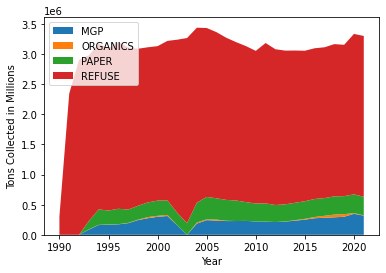

In [10]:
plt.stackplot(DSNY_pivot['YEAR'], DSNY_pivot['MGP'], DSNY_pivot["ORGANICS"], DSNY_pivot["PAPER"], DSNY_pivot["REFUSE"]) #The YEAR is passed first, as the X-avis values, the other values after will be interpreted as y-values
plt.legend(['MGP', "ORGANICS", "PAPER", "REFUSE"], loc = "upper left")
plt.xlabel("Year")
plt.ylabel("Tons Collected in Millions")
plt.show()

## Optional
### I attempted the stacked plot with the 'altair' package. Ultimately, I wasn't able to create a stacked plot with all four tonnage variables included in a single plot. However, altair has its advantages, as I like it's 'interactive()' feature. Below are altair area plots of each individual waste tonnage variable. These plots are best used and displayed inside a Jupyter Notebook. 

In [76]:
alt.Chart(DSNY_pivot).mark_area(opacity=0.3).encode(
    alt.X("YEAR", type = "ordinal"),
    alt.Y("MGP", type = "quantitative", title = "MGP Tonnage")
).interactive()

alt.Chart(...)

In [75]:
alt.Chart(DSNY_pivot).mark_area(opacity=0.3).encode(
    alt.X("YEAR", type = "ordinal"),
    alt.Y("REFUSE", type = "quantitative", title="Refuse Tonnage")
).interactive()

alt.Chart(...)

In [67]:
alt.Chart(DSNY_pivot).mark_area(opacity=0.3).encode(
    alt.X("YEAR", type = "ordinal"),
    alt.Y("MGP", type = "quantitative", title="MGP Tonnage")
).interactive()

alt.Chart(...)

In [69]:
alt.Chart(DSNY_pivot).mark_area(opacity=0.3).encode(
    alt.X("YEAR", type = "ordinal"),
    alt.Y("ORGANICS", type = "quantitative", title = "Organics Tonnage")
).interactive()

alt.Chart(...)

In [70]:
alt.Chart(DSNY_pivot).mark_area(opacity=0.3).encode(
    alt.X("YEAR", type = "ordinal"),
    alt.Y("PAPER", type = "quantitative", title = "Paper Tonnage")
).interactive()

alt.Chart(...)